In [183]:
from scipy import stats as st
import matplotlib.pyplot as plt
import matplotlib as mpl
import data_loader as data_loader
import data_processor as data_processor
import path_mgmt as myPath
import pandas as pd
import numpy as np
import json
from json import JSONEncoder
import glob
from pathlib import Path
from tqdm.auto import tqdm
import os
import zipfile
from datetime import datetime
from pyplotz.pyplotz import PyplotZ
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
plt.style.use('ggplot')

### Data Loader Usage Examples

> processed 1 min data: 
- name: **stk_1min**
- fields: code, open, close, low, high, open_std, close_std, total_volume, total_turnover, volume_std, turnover_std

In [87]:
# read from data from 20180101 to 20180110, columns are code, open and close
stocks = data_loader.loading(
    tab_name="stk_1min", start='20180101', end='20180110', fields=['code', 'open', 'close'])

In [88]:
# here price is multiplied by 10,000
stocks.head()

,code,open,close
time,,,
2018-01-02,1,133500,137000
2018-01-02,2,314500,325600
2018-01-02,4,222900,223400
2018-01-02,5,41500,43200
2018-01-02,8,87500,87700


In [90]:
# read 30 trading days data starting from 20180101, columns are code, open and close
stocks = data_loader.loading(
    tab_name="stk_1min", start='20180101', N=30, fields=['code', 'open', 'close'])

In [91]:
stocks.tail()

,code,open,close
time,,,
2018-02-12,603991,207800,216800
2018-02-12,603993,62400,64800
2018-02-12,603996,160500,161200
2018-02-12,603997,105300,107100
2018-02-12,603999,66800,68800


In [92]:
# read 30 trading days data backwardly starting from 20190101, columns are code, open and close
stocks = data_loader.loading(
    tab_name="stk_1min", start='20190101', N=-30, fields=['code', 'open', 'close'])

In [93]:
stocks.head()

,code,open,close
time,,,
2018-11-19,1,105700,108500
2018-11-19,2,247000,259700
2018-11-19,4,174899,173299
2018-11-19,5,31700,31700
2018-11-19,6,56700,58099


> major index data: 
- name: **index**
- fields: code, name, date, pre_close, open, high, low, close, amt, vol, chg, chg_pct

In [94]:
# read 30 trading days data starting from 20180101, columns are code, name and close
index = data_loader.loading(
    tab_name="index", start='20180101', N=30, fields=['code', 'name', 'close'])

In [95]:
index.head()

,code,name,close
time,,,
2018-01-02,1,上证综指,3348.3259
2018-01-02,300,沪深300,4087.4012
2018-01-02,852,中证1000,7092.0947
2018-01-02,905,中证500,6332.2269
2018-01-02,906,中证800,4467.2791


> limit data: 
- name: **limits**
- fields: code, up_limit, down_limit

In [96]:
# read 30 trading days data backwardly starting from 20190101, columns are code, up_limit and down_limit
limit = data_loader.loading(
    tab_name="limits", start='20190101', N=-30, fields=['code', 'up_limit', 'down_limit'])

In [97]:
limit.head()

,code,up_limit,down_limit
time,,,
2018-11-19,1,11.63,9.51
2018-11-19,2,27.26,22.30
2018-11-19,4,19.09,15.62
2018-11-19,5,3.47,2.84
2018-11-19,6,6.07,4.97


> market value data: 
- name: **mkt_value**
- fields: code, date, neg_mkt_val, mkt_val, neg_shares, shares

In [98]:
# read 30 trading days data backwardly starting from 20190101, columns are code, neg_mkt_val and neg_shares
market_value = data_loader.loading(
    tab_name="mkt_value", start='20190101', N=-30, fields=['code', 'neg_mkt_val', 'neg_shares'])

In [99]:
market_value.head()

,code,neg_mkt_val,neg_shares
time,,,
2018-11-19,1,1.862972e+11,1.717025e+10
2018-11-19,2,2.523030e+11,9.715170e+09
2018-11-19,4,1.438619e+09,8.301320e+07
2018-11-19,5,3.015375e+09,9.512225e+08
2018-11-19,6,7.833669e+09,1.348308e+09


> industry data: 
- name: **industry**
- fields: code, sw1, sw2, sw3

In [100]:
# read 30 trading days data backwardly starting from 20190101, columns are code, sw1, sw2 and sw3
industry = data_loader.loading(
    tab_name="industry", start='20190101', N=-30, fields=['code', 'sw1', 'sw2', 'sw3'])

In [101]:
industry.head()

,code,sw1,sw2,sw3
time,,,,
2018-11-19,1,银行,银行,银行
2018-11-19,2,房地产,房地产开发,房地产开发
2018-11-19,3,综合,综合,综合
2018-11-19,4,医药生物,生物制品,生物制品
2018-11-19,5,公用事业,环保工程及服务,环保工程及服务


> universe data:
- name: **universe**
- fields: hs300, zz500, zz800, zz1000, zz9999

In [105]:
# read 30 trading days data backwardly starting from 20190101, universe is hs300
universe = data_loader.loading(
    tab_name="universe", start='20190101', N=-30, fields='hs300')

In [106]:
universe.head()

,code,name
time,,
2018-11-19,1,平安银行
2018-11-19,2,万科A
2018-11-19,60,中金岭南
2018-11-19,63,中兴通讯
2018-11-19,69,华侨城A


> cumulative adjust factor data:
- name: **adj_factor**
- fields: code, cum_adjf

In [107]:
# read 30 trading days data backwardly starting from 20190101, column is code and cum_adjf
adj_factor = data_loader.loading(
    tab_name="adj_factor", start='20190101', N=-30, fields=['code', 'cum_adjf'])

In [108]:
adj_factor.head()

,code,cum_adjf
time,,
2018-11-19,1,100000
2018-11-19,10,100000
2018-11-19,100,100000
2018-11-19,11,100000
2018-11-19,12,100000


> halts data:
- name: **halt_date**
- fields: date, code, name

In [109]:
# read data from 20180101 to 20181231, column is date, code and name
halt_dates = data_loader.loading(tab_name="halt_date", start='20180101', end='20181231', fields=['date', 'code', 'name'])

In [110]:
halt_dates.head()

,code,name
date,,
2018-01-02,6,深振业Ａ
2018-01-02,7,全新好
2018-01-02,19,深深宝Ａ
2018-01-02,29,深深房Ａ
2018-01-02,31,中粮地产


> ST data:
- name: **ST_date**
- fields: code, name, status_id, transition, date

In [111]:
# read data from 20180101 to 20181231, column is code, name, status_id and transition
ST_date = data_loader.loading(tab_name="ST_date", start='20180101', end='20181231', fields=[
                              'code', 'name', 'status_id', 'transition'])

In [112]:
ST_date.head()

,code,name,status_id,transition
date,,,,
2018-01-02,600614,鼎立股份,1,2->1->2->4->6->1->7->5
2018-01-02,916,华北高速,5,5
2018-01-02,600553,太行水泥,5,5
2018-01-02,866,扬子石化,5,5
2018-01-02,418,小天鹅A,1,2->1->5


### Some preliminary EDA

In [113]:
# load daily close, volume and turnover for the whole period
stocks = data_loader.loading(
    tab_name="stk_1min", start='20180101', end='20201231', fields=['code', 'close', 'total_volume', 'total_turnover'])

In [114]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2432944 entries, 2018-01-02 to 2020-12-31
Data columns (total 4 columns):
 #   Column          Dtype
---  ------          -----
 0   code            int64
 1   close           int64
 2   total_volume    int64
 3   total_turnover  int64
dtypes: int64(4)
memory usage: 92.8 MB


In [121]:
print(f"We have a population of {stocks.code.nunique()} stocks, and a total of {stocks.index.nunique()} trading days")


We have a population of 3808 stocks, and a total of 730 trading days


In [123]:
# read the universe from whole market
zz9999_universe = data_loader.loading(
    tab_name="universe", start='20180101', end='20201231', fields='zz9999')

In [12]:
zz9999_universe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2473875 entries, 2018-01-02 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   code    int64 
 1   name    object
dtypes: int64(1), object(1)
memory usage: 56.6+ MB


In [129]:
print(f"There are {zz9999_universe.code.nunique()} unique codes in the universe.")

There are 3810 unique codes in the universe.


In [133]:
# merge stocks with the universe name
stocks = stocks.reset_index().merge(zz9999_universe.reset_index(), on=['time', 'code']).set_index('time')

In [134]:
stocks.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2432944 entries, 2018-01-02 to 2020-12-31
Data columns (total 5 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   code            int64 
 1   close           int64 
 2   total_volume    int64 
 3   total_turnover  int64 
 4   name            object
dtypes: int64(4), object(1)
memory usage: 111.4+ MB


In [135]:
stocks.isnull().sum()

code              0
close             0
total_volume      0
total_turnover    0
name              0
dtype: int64

In [281]:
def myplot(df, kind='bar', title=''):
    pltz = PyplotZ()
    pltz.enable_chinese()
    df.plot(kind=kind)
    if kind == 'bar':
        pltz.xticks(np.arange(len(df.index)), df.index, rotation=45)
    pltz.legend("")
    pltz.title(title)
    pltz.legend(loc='best')
    pltz.show()

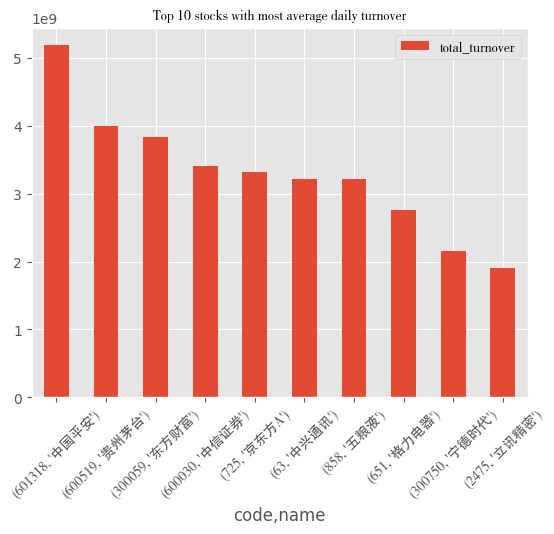

In [282]:
myplot(stocks.groupby(['code', 'name']).total_turnover.mean(
).sort_values(ascending=False).head(10), kind='bar', title="Top 10 stocks with most average daily turnover")

In [138]:
# read industry category data
industry = data_loader.loading(
    tab_name="industry", start='20180101', end='20201231', fields=['code', 'sw1', 'sw2', 'sw3'])

In [139]:
industry.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2784964 entries, 2018-01-02 to 2020-12-31
Data columns (total 4 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   code    int64 
 1   sw1     object
 2   sw2     object
 3   sw3     object
dtypes: int64(1), object(3)
memory usage: 106.2+ MB


In [141]:
print(f"There are {industry.sw1.nunique()} level 1 industries, {industry.sw2.nunique()} level 2 industries, {industry.sw3.nunique()} level 3 industries. ")

There are 28 level 1 industries, 105 level 2 industries, 228 level 3 industries. 


In [142]:
# merge stocks with the industry level
stocks = stocks.reset_index().merge(industry.reset_index(),
                                    on=['time', 'code']).set_index('time')

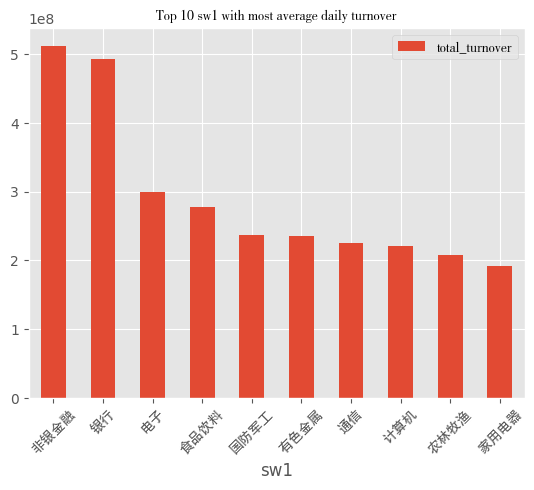

In [164]:
myplot(stocks.groupby(['sw1']).total_turnover.mean(
).sort_values(ascending=False).head(10), kind='bar', title="Top 10 sw1 with most average daily turnover")


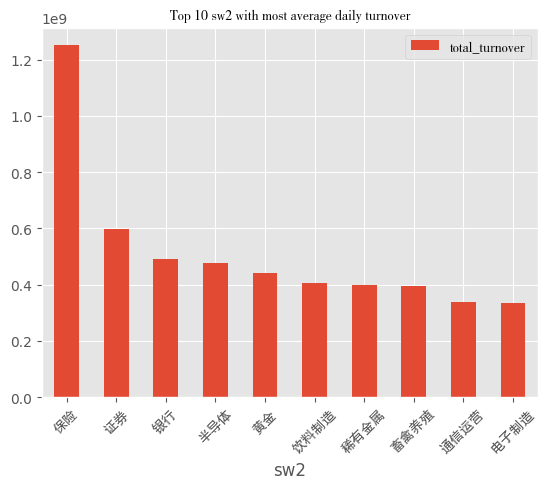

In [165]:
myplot(stocks.groupby(['sw2']).total_turnover.mean(
).sort_values(ascending=False).head(10), kind='bar', title="Top 10 sw2 with most average daily turnover")


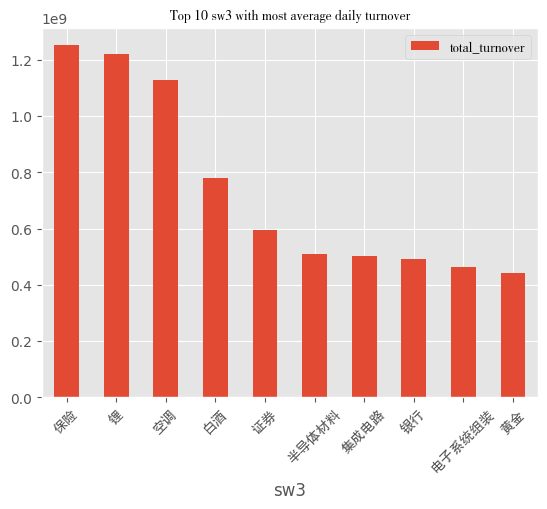

In [166]:
myplot(stocks.groupby(['sw3']).total_turnover.mean(
).sort_values(ascending=False).head(10), kind='bar', title="Top 10 sw3 with most average daily turnover")

In [147]:
# load market value
market_value = data_loader.loading(
    tab_name="mkt_value", start='20180101', end='20201231', fields=['code', 'neg_mkt_val', 'mkt_val', 'neg_shares', 'shares'])

In [148]:
market_value.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2699313 entries, 2018-01-02 to 2020-12-31
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   code         int64  
 1   neg_mkt_val  float64
 2   mkt_val      float64
 3   neg_shares   float64
 4   shares       float64
dtypes: float64(4), int64(1)
memory usage: 123.6 MB


In [149]:
market_value.head()

,code,neg_mkt_val,mkt_val,neg_shares,shares
time,,,,,
2018-01-02,1,2.317765e+11,2.352346e+11,1.691799e+10,1.717041e+10
2018-01-02,2,3.161304e+11,3.594348e+11,9.709165e+09,1.103915e+10
2018-01-02,4,1.853409e+09,1.876039e+09,8.296370e+07,8.397670e+07
2018-01-02,5,4.109281e+09,4.572879e+09,9.512225e+08,1.058537e+09
2018-01-02,6,1.324992e+10,1.329745e+10,1.345169e+09,1.349995e+09


In [150]:
# merge stocks with the market value
stocks = stocks.reset_index().merge(market_value.reset_index(),
                                    on=['time', 'code']).set_index('time')

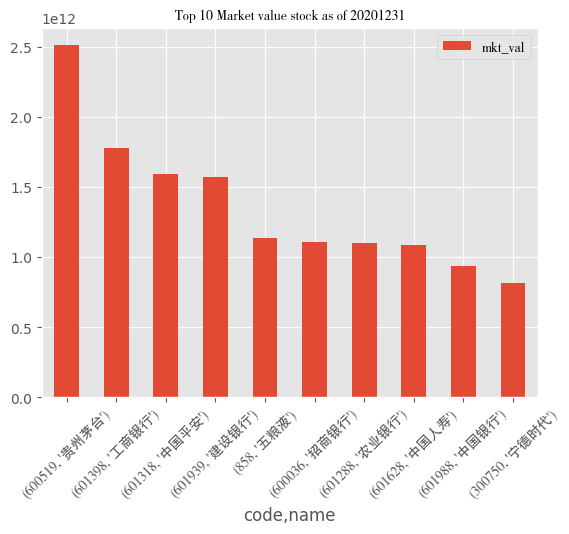

In [167]:
myplot(stocks.loc[stocks.index == '20201231'].groupby(['code', 'name']).mkt_val.sum().sort_values(ascending=False).head(10), kind='bar', title='Top 10 Market value stock as of 20201231')

In [201]:
def pieplots(df, title=''):
    fig1, ax1 = plt.subplots(figsize=(6, 5))
    fig1.subplots_adjust(0.3, 0, 1, 1)
    pltz = PyplotZ()
    pltz.enable_chinese()

    theme = plt.get_cmap('jet')
    ax1.set_prop_cycle("color", [theme(1. * i / len(df.index))
                                 for i in range(len(df.index))])

    _, _ = ax1.pie(df.values, startangle=90)

    ax1.axis('equal')

    total = sum(df.values)
    pltz.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100) for l, s in zip(df.index, df.values)],
        prop={'size': 11},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )
    pltz.title(title)
    pltz.show()


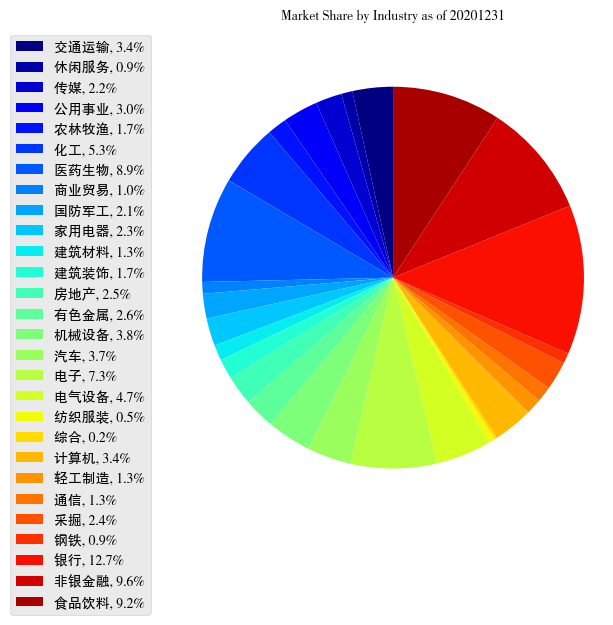

In [203]:
pieplots(stocks.loc[stocks.index == '20201231'].groupby(
    'sw1').mkt_val.sum(), title='Market Share by Industry as of 20201231')

In [220]:
# compute daily returns
stocks['logret'] = stocks.groupby('code').close.transform(
    lambda x: np.log(x) - np.log(x.shift()))

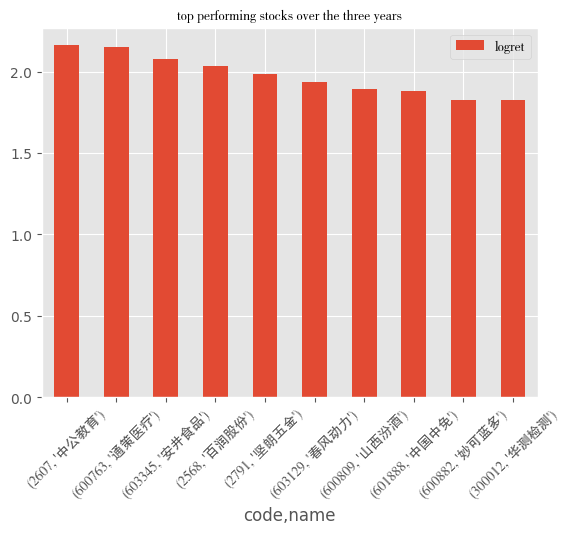

In [234]:
myplot(stocks.groupby(['code', 'name']).logret.sum().sort_values(ascending=False).head(10), kind='bar', title='top performing stocks over the three years')

<Axes: title={'center': '600763 stock price'}, xlabel='time'>

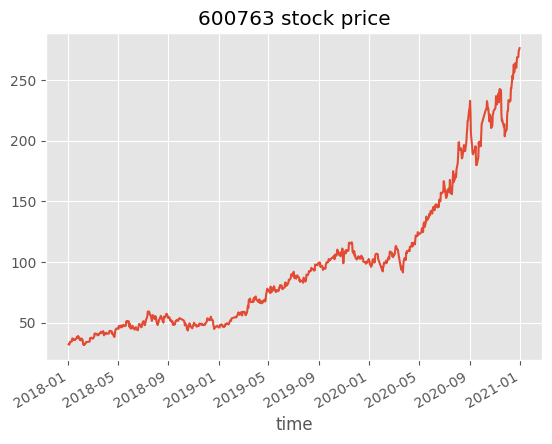

In [236]:
# plot one example
(stocks.loc[stocks.code==600763].close/10000).plot(title='600763 stock price')

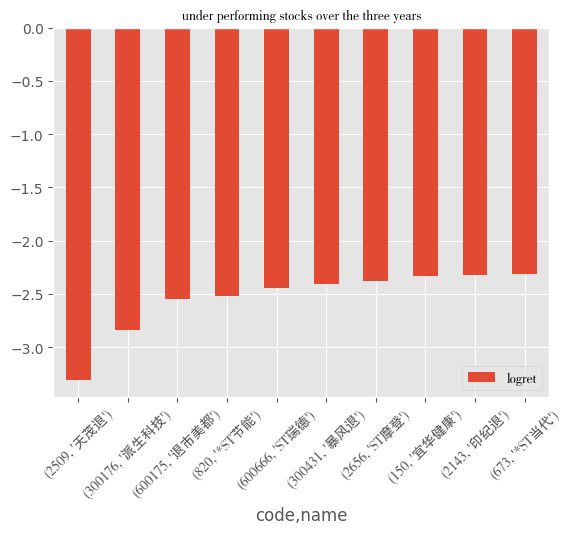

In [237]:
myplot(stocks.groupby(['code', 'name']).logret.sum().sort_values(ascending=True).head(
    10), kind='bar', title='under performing stocks over the three years')


<Axes: title={'center': '300176 stock price'}, xlabel='time'>

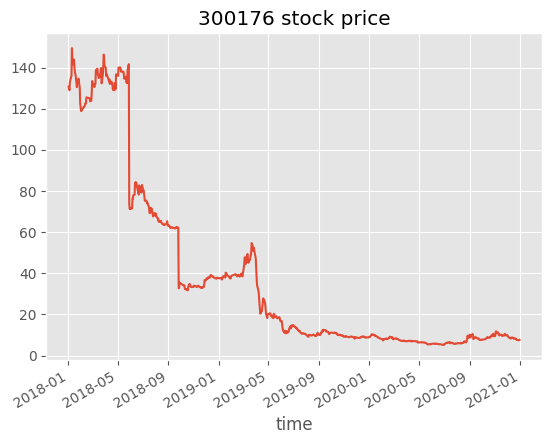

In [238]:
# plot one example
(stocks.loc[stocks.code==300176].close/10000).plot(title='300176 stock price')

In [245]:
daily_sharpe = stocks.groupby(['code', 'name']).logret.mean() / \
    stocks.groupby(['code', 'name']).logret.std()

In [248]:
daily_sharpe.sort_values(ascending=False).head(10)

code    name
688116  天奈科技    0.588876
688333  铂力特     0.465014
688388  嘉元科技    0.446208
688030  山石网科    0.399142
688022  瀚川智能    0.377489
688006  杭可科技    0.374770
688369  致远互联    0.374615
603087  甘李药业    0.366990
688122  西部超导    0.314601
688036  传音控股    0.289030
Name: logret, dtype: float64

<Axes: title={'center': '688116 stock price'}, xlabel='time'>

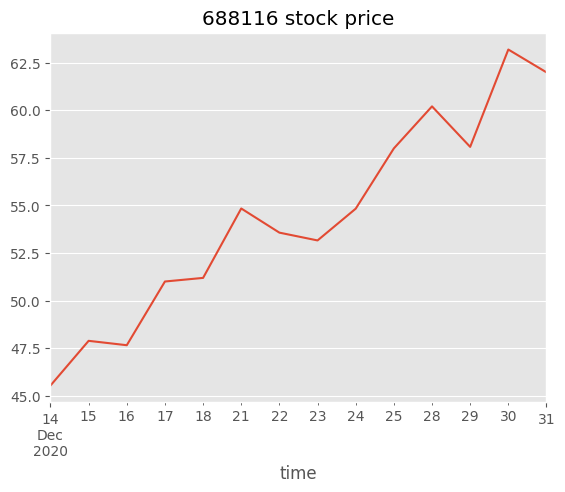

In [253]:
# plot one example
# TODO: data is missing for some dates?
(stocks.loc[stocks.code==688116].close/10000).plot(title='688116 stock price')

In [254]:
daily_sharpe.sort_values(ascending=True).head(10)

code    name 
2260    *ST德奥   -223.657622
2122    ST天马     -93.127903
600807  济南高新      -1.138760
2604    龙力退       -0.822869
603408  建霖家居      -0.722208
2982    湘佳股份      -0.697148
600074  退市保千      -0.663092
600634  退市富控      -0.620467
603095  越剑智能      -0.611210
300840  酷特智能      -0.606159
Name: logret, dtype: float64

<Axes: title={'center': '603408 stock price'}, xlabel='time'>

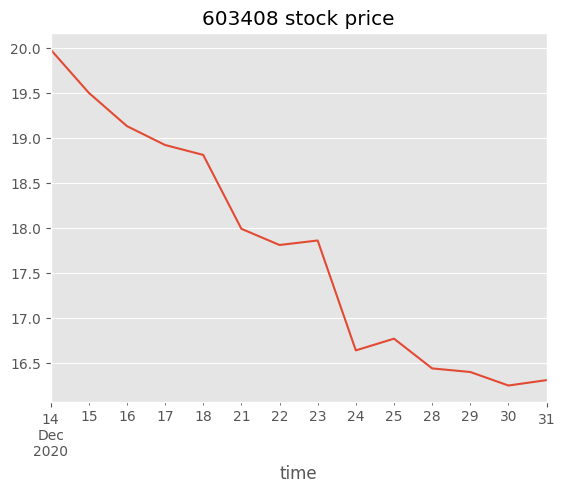

In [264]:
# plot one example
# TODO: data is missing for some dates?
(stocks.loc[stocks.code==603408].close/10000).plot(title='603408 stock price')

In [265]:
# load index price
index = data_loader.loading(
    tab_name="index", start='20180101', end='20201231', fields=['code', 'name', 'close'])

In [284]:
index.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5110 entries, 2018-01-02 to 2020-12-31
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   code    5110 non-null   int64  
 1   name    5110 non-null   object 
 2   close   5110 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 159.7+ KB


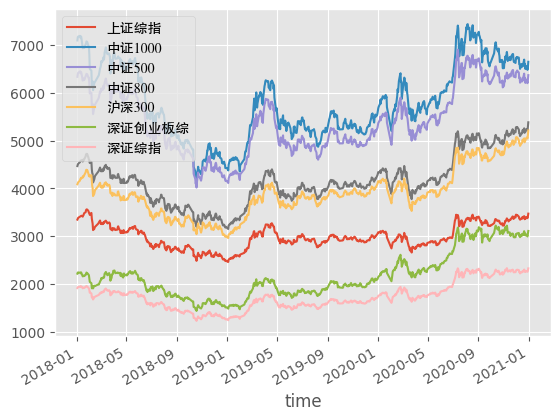

In [283]:
myplot(index.groupby('name').close, kind='line')

In [285]:
# load trading halts data
halt_dates = data_loader.loading(
    tab_name="halt_date", start='20180101', end='20201231', fields=['date', 'code', 'name'])

In [286]:
halt_dates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 51121 entries, 2018-01-02 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    51121 non-null  int64 
 1   name    51121 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.2+ MB


In [86]:
# days with most halts
halt_dates.reset_index().groupby('date').code.count().sort_values(ascending=False).head(10)

date
2018-02-08    349
2018-02-09    342
2018-02-07    341
2018-02-06    332
2018-02-12    328
2018-02-05    323
2018-02-13    320
2018-02-14    306
2018-02-22    295
2018-02-23    287
Name: code, dtype: int64

In [287]:
# days with least halts
halt_dates.reset_index().groupby(
    'date').code.count().sort_values(ascending=True).head(10)

date
2020-02-17    11
2020-02-19    11
2020-02-25    11
2020-02-24    11
2020-02-14    11
2020-02-20    11
2019-02-14    12
2020-02-28    12
2019-01-10    12
2020-02-21    12
Name: code, dtype: int64

In [288]:
# load ST data
ST_date = data_loader.loading(tab_name="ST_date", start='20180101', end='20201231', fields=[
                              'code', 'name', 'status_id', 'transition'])


In [292]:
# days with most ST stocks
ST_date[ST_date.status_id == 2].reset_index().groupby(
    'date').code.count().sort_values(ascending=False).head(10)

date
2020-11-05    201
2020-11-12    201
2020-11-25    201
2020-11-24    201
2020-11-23    201
2020-11-20    201
2020-11-19    201
2020-11-18    201
2020-11-17    201
2020-11-16    201
Name: code, dtype: int64

In [293]:
# days with least ST stocks
ST_date[ST_date.status_id == 2].reset_index().groupby(
    'date').code.count().sort_values(ascending=True).head(10)


date
2018-04-20    61
2018-04-19    61
2018-04-18    61
2018-04-17    61
2018-04-16    61
2018-04-23    62
2018-04-12    62
2018-04-10    63
2018-04-13    63
2018-04-11    63
Name: code, dtype: int64